In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

In [2]:
database_name = 'sociology-wos'
dtype='c'
birth_key='first'
definitions_of_death = ['death_1','rebirth_1_3']
#definitions_of_death = ['death1']

In [3]:
# Parameters
database_name = "sociology-wos"
dtype = "fa"
birth_key = "first"


In [4]:
# constructing a template for plotting
plot_args = {"database":database_name, "overwrite":True,"ctype":dtype,"cols":3,"rows_per_group":3}
plot_args['yearly_prop'] = False

In [5]:
filename_modifiers = [dtype, database_name]

In [6]:
if plot_args['yearly_prop']:
    filename_modifiers.append("proportional")

In [7]:
print(plot_args)

{'database': 'sociology-wos', 'overwrite': True, 'ctype': 'fa', 'cols': 3, 'rows_per_group': 3, 'yearly_prop': False}


In [8]:

if dtype=='t' and False: # no longer needed
    plot_args.update(dict(
        print_names=lambda t: "-".join(t),
    ))
    
if dtype=='c':
    plot_args.update(dict(
        print_names=lambda t: " ".join(t.split("|")).title(),
    ))
    
if 'jstor' in database_name:
    # dataset limitations
    
    plot_args.update(dict(
        xlim_display=(1965,2015),
        xlim_data=(1970,2010),
        cols=6
    ))
    
if 'jstor' in database_name:
    # dataset limitations
    
    plot_args.update(dict(
        xlim_display=(1965,2015),
        xlim_data=(1970,2010),
        cols=6
    ))

In [9]:
top1 = load_variable("%s.%s.top1" % (database_name,dtype))
ysum = load_variable("%s.%s.ysum" % (database_name,dtype))

In [10]:
top1.columns

Index(['total', 'maxcount', 'first', 'maxcounty', 'death_4', 'death_8',
       'maxpropy', 'death_9', 'death_max', 'death_7', 'death_last',
       'totalprop', 'last', 'death_1', 'maxprop', 'death_3', 'death_5',
       'death_2', 'death_6', 'name'],
      dtype='object')

In [11]:
for deathk in sorted([x for x in top1.columns if 'death_' in x or 'rebirth_' in x]):
    c = np.sum(~np.isnan(top1[deathk]))
    print("%d (%0.2f%%) have a nonnull %s" %(
        c,
        100*c / top1.shape[0],
        deathk
    ))

132 (57.64%) have a nonnull death_1
156 (68.12%) have a nonnull death_2
169 (73.80%) have a nonnull death_3
177 (77.29%) have a nonnull death_4
184 (80.35%) have a nonnull death_5
189 (82.53%) have a nonnull death_6
194 (84.72%) have a nonnull death_7
199 (86.90%) have a nonnull death_8
199 (86.90%) have a nonnull death_9
126 (55.02%) have a nonnull death_last
201 (87.77%) have a nonnull death_max


# visualize a random 100 top1% lives

In [12]:
database_name

'sociology-wos'

In [13]:
definitions_of_death = ['death_1','rebirth_3_5','death_3','death_5']

In [14]:
from random import sample
toplot = [x for x in sample(list(top1.get("name")), 72)]

In [15]:
toplot = sorted(toplot, key=lambda x: ysum[x][birth_key])

In [16]:
def get_name(x):
    sp = x.split("_")
    if len(sp) == 2: # death
        return sp[-1]
    if len(sp) == 3:
        return "R"# % sp[-1]

Loaded keys: dict_keys(['fa.fy', 'fy'])
Available keys: ['a', 'c', 'c.c', 'c.fj', 'c.fy', 'c.fy.j', 'fa', 'fa.c', 'fa.fj', 'fa.fj.fy', 'fa.fy', 'fj', 'fj.fy', 'fj.ta', 'fj.ty', 'fy', 'fy.ta', 'fy.ty', 'ta', 'ty', 'ty.ty']
smith, t
hagood, m
winch, r
porterfield, a
form, w
turner, r
lee, r
toby, j
lipset, s


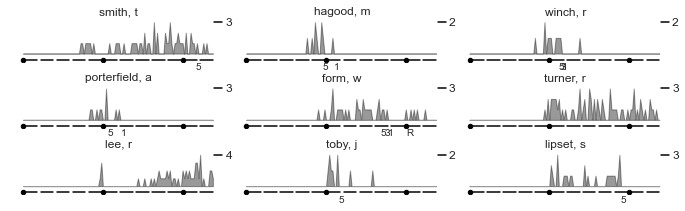

goodman, l
simpson, r
brown, p
schnore, l
blau, p
davis, j
jones, f
cutright, p
gibbs, j


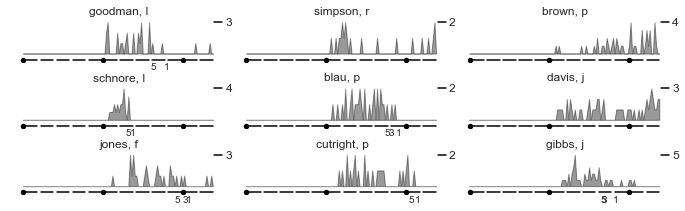

lefton, m
fuguitt, g
tarver, j
perrucci, r
runciman, w
fox, j
phillips, d
goldstein, s
kandel, d


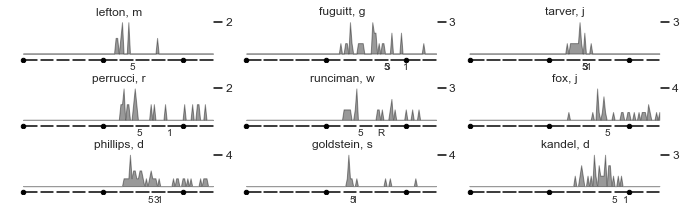

labovitz, s
weintraub, d
summers, g
hauser, r
nelsen, h
richardson, j
morgan, d
gove, w
lewis, g


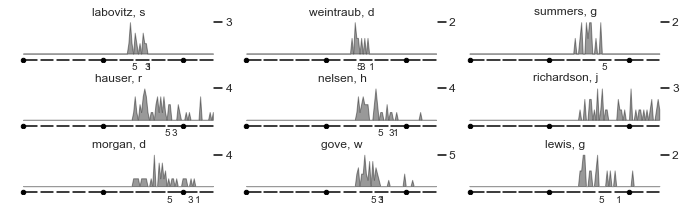

hazelrigg, l
bean, f
sorensen, a
hindelang, m
weigert, a
flinn, w
hope, k
roof, w
rubinson, r


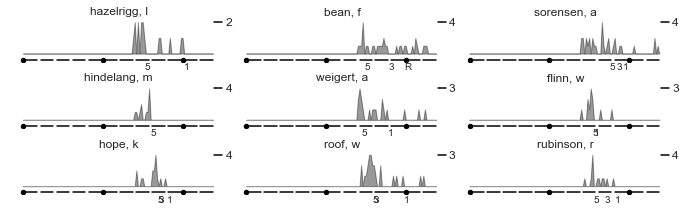

ross, c
levine, d
useem, m
miller, m
huber, j
kalleberg, a
lemert, c
driedger, l
hannan, m


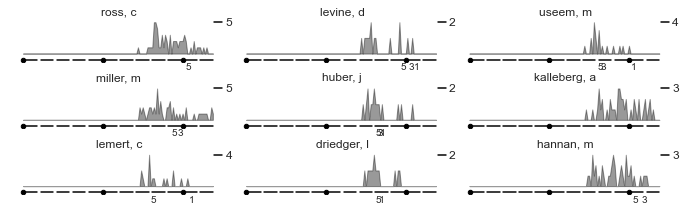

tamney, j
buttel, f
ragin, c
london, b
griffin, l
wright, s
hughes, m
baker, p
tienda, m


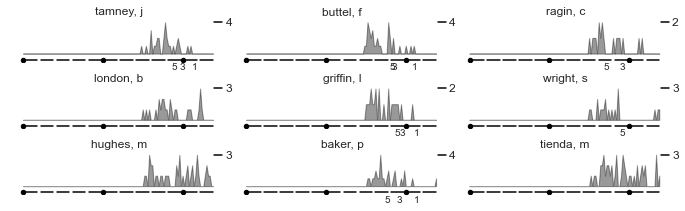

johnson, j
tinsley, h
jacobs, d
lorence, j
mirowsky, j
lichter, d
clogg, c
carroll, g
wilcox, c


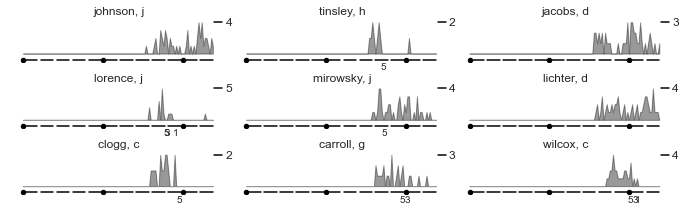

In [17]:
plot_args.update(dict(
    alltop = toplot,
    myname = "100lives random big (%s)" % ",".join( str(x) for x in filename_modifiers ), 
    markers={
        t: { 
            ysum[t][dk]:get_name(dk) # last character of a death key is the number,
            for dk in definitions_of_death 
            if ysum[t][dk] is not None # only deaths that happened
        }
        for t in toplot        
    },ctype=dtype
))

plot_count_series( **plot_args )

# unremarkable lives before 2000

Loaded keys: dict_keys(['fa.fy', 'fy'])
Available keys: ['a', 'c', 'c.c', 'c.fj', 'c.fy', 'c.fy.j', 'fa', 'fa.c', 'fa.fj', 'fa.fj.fy', 'fa.fy', 'fj', 'fj.fy', 'fj.ta', 'fj.ty', 'fy', 'fy.ta', 'fy.ty', 'ta', 'ty', 'ty.ty']
kirkpatrick, c
firey, w
turner, r
strodtbeck, f
kriesberg, l
case, h
field, m
steiner, i
nye, f


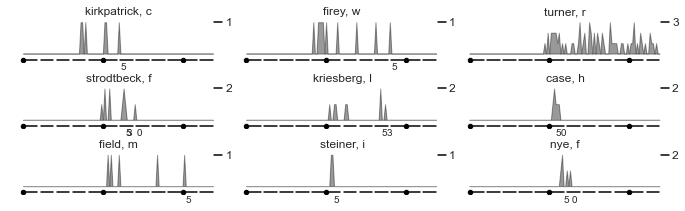

zald, m
eldridge, j
nasatir, d
michelson, w
wanderer, j
franklin, b
hartnagel, t
woelfel, j
rubinson, r


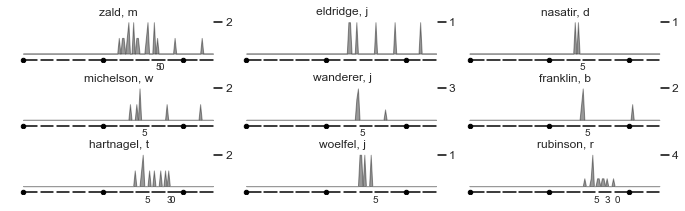

schudson, m
lally, j
mitroff, i
martin, p
wolinsky, f
zimmer, t
molnar, j
hicks, a
neis, b


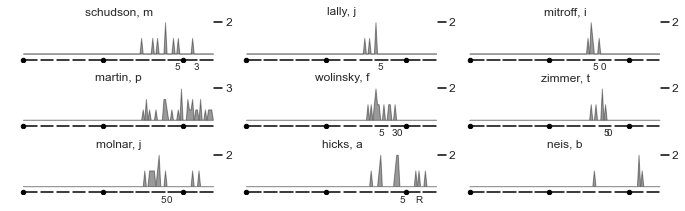

davis, e
rapoport, a
kim, y
griswold, w
davanzo, j
faust, k
armstrong, p
ferraro, k
osgood, d


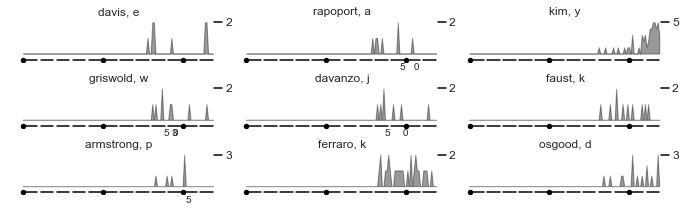

parnell, a
miethe, t
light, s
shafir, g
travis, r
cheng, m
haslam, c
bennett, t
saenz, r


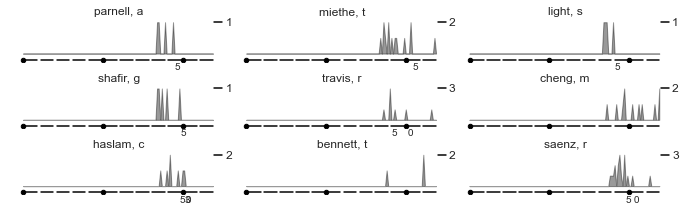

hultsman, w
ritchey, f
nesti, a
fong, e
hernandez, e
lawson, s
sung, j
bello, r
wilmoth, j


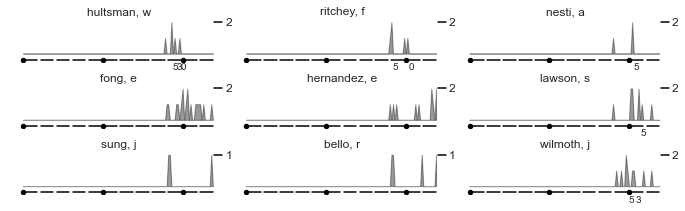

barnett, r
carltonford, s
bradshaw, j
jarvinen, m
melnick, m
salazar, d
dershem, l
quillian, l
dillon, m


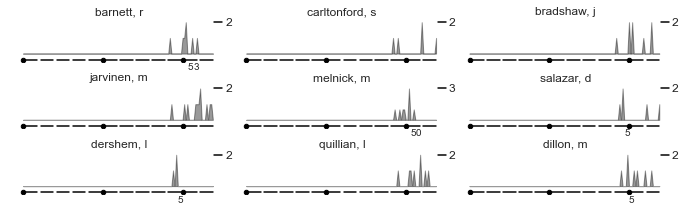

sheppard, j
maxwell, c
ulmer, j
english, d
looman, c
arias, e
mclean, p
oconnor, r
getz, c


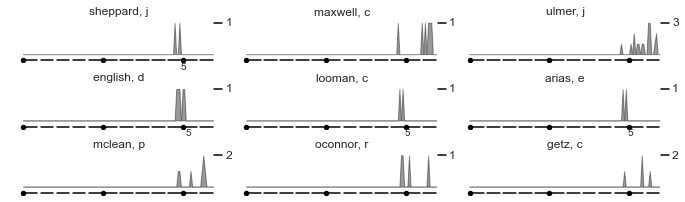

In [18]:
from random import sample

definitions_of_death = ['death_0','rebirth_0_5','death_3','death_5']

toplot = sample([x for x in ysum if ysum[x]['first'] < 2000], 72)
toplot = sorted(toplot, key=lambda x: ysum[x]['first'])

plot_args.update(dict(
    alltop = toplot,
    myname = "100lives random unremarkable (%s)" % ",".join( str(x) for x in filename_modifiers ), 
    markers={
        t: { 
            ysum[t][dk]:get_name(dk) # last character of a death key is the number,
            for dk in definitions_of_death 
            if ysum[t][dk] is not None # only deaths that happened
        }
        for t in toplot        
    },
))

plot_count_series(**plot_args)

# visualize a random 100 top1% death0s

126/229
Loaded keys: dict_keys(['fa.fy', 'fy'])
Available keys: ['a', 'c', 'c.c', 'c.fj', 'c.fy', 'c.fy.j', 'fa', 'fa.c', 'fa.fj', 'fa.fj.fy', 'fa.fy', 'fj', 'fj.fy', 'fj.ta', 'fj.ty', 'fy', 'fy.ta', 'fy.ty', 'ta', 'ty', 'ty.ty']
becker, h
winch, r
christensen, h
cahnman, w
riemer, s
wallin, p
mayo, s
hatt, p
form, w


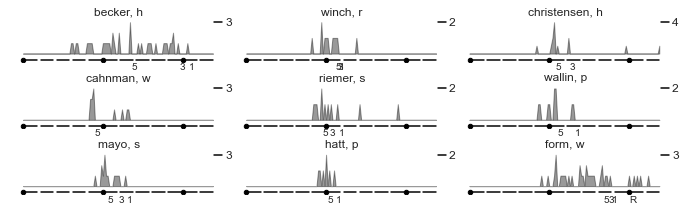

rose, a
kephart, w
wilkening, e
toby, j
reiss, a
lipset, s
goodman, l
bell, w
kerckhoff, a


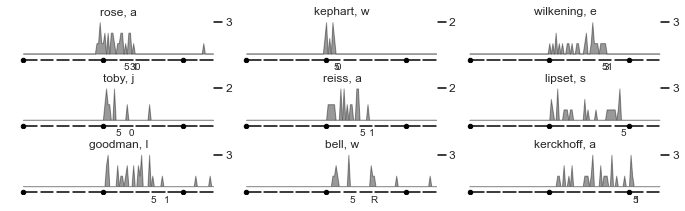

dornbusch, s
fliegel, f
freeman, h
blalock, h
bealer, r
lefton, m
pasamanick, b
cutright, p
lieberson, s


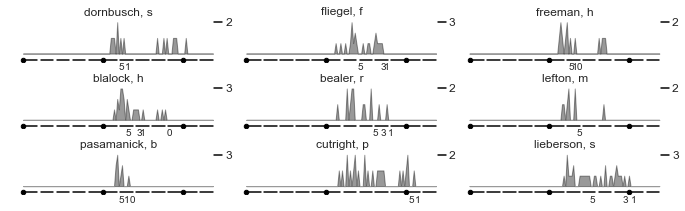

etzioni, a
curtis, r
runciman, w
segal, b
glaser, b
hodge, r
rushing, w
photiadis, j
bonjean, c


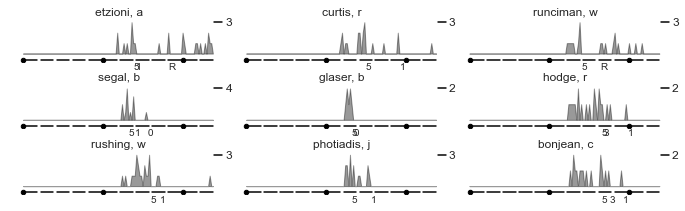

goldstein, s
rogers, d
nelsen, h
gove, w
weigert, a
flinn, w
sorensen, a
hope, k


clemente, f


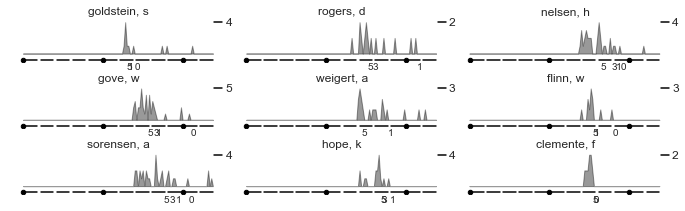

levine, d
peek, c
rubinson, r
useem, m
pope, w
huber, j
lyson, t
wallis, r
murdock, s


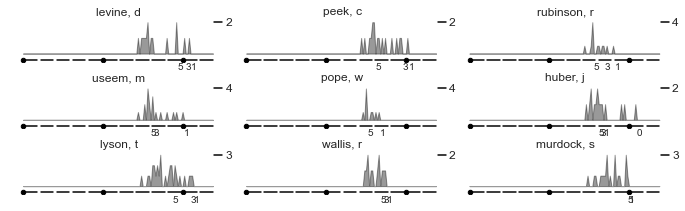

tamney, j
buttel, f
kelly, w
frisbie, w
griffin, l
hunt, l
wright, s
lincoln, j
baker, p


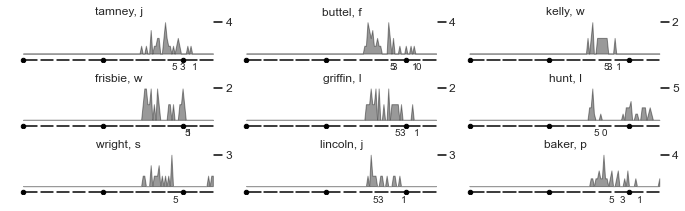

szafran, r
krohn, m
christenson, j
kluegel, j
tinsley, h
stack, s
clogg, c
mcallister, i
wilcox, c


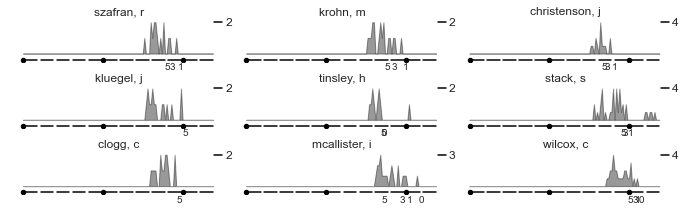

In [19]:
from random import sample

definitions_of_death = ['death_0','death_1','rebirth_3_5','death_3','death_5']

toplot = [x for x in top1.get("name") if ysum[x]['death_0']]

print("%s/%s" % (len(toplot), len(top1.get("name"))))

shuffle(toplot)
toplot = toplot[:72]

toplot = sorted(toplot, key=lambda x: ysum[x][birth_key])


plot_args.update(dict(
    alltop = toplot,
    myname = "100lives dead0 (%s)" % ",".join( str(x) for x in filename_modifiers ), 
    markers={
        t: { 
            ysum[t][dk]:get_name(dk) # last character of a death key is the number,
            for dk in definitions_of_death 
            if ysum[t][dk] is not None # only deaths that happened
        }
        for t in toplot        
    },
))

plot_count_series(**plot_args)

In [20]:
# The above plot is much better.

if False:

    # visualize a random 100 top1% death2s

    from random import sample

    toplot = list(top1[~np.isnan(top1.death2)].get("name"))
    shuffle(toplot)
    toplot = toplot[:100]

    toplot = sorted(toplot, key=lambda x: ysum[x][birth_key])

    plot_count_series(
        toplot, 
        database_name, 
        myname="%s.100 big death2s of <b>%s</b> (%s)" % (dtype, database_name), 
        overwrite=True, 
        markers={}, 
        cysum=ysum, 
        ctype=dtype
    )

    # visualize 100 top1% death3s

    from random import sample

    toplot = list(top1[~np.isnan(top1.death3)].get("name"))
    shuffle(toplot)
    toplot = toplot[:100]
    toplot = sorted(toplot, key=lambda x: ysum[x][birth_key])

    plot_count_series(
        toplot, 
        database_name, 
        myname="%s.100 big death3s of <b>%s</b> (%s)" % (dtype, database_name), 
        overwrite=True, 
        markers={t:[ysum[t]['death3']] for t in toplot}, 
        cysum=ysum, 
        ctype=dtype
    )

    from random import sample

    toplot = list(top1[~np.isnan(top1.death5)].get("name"))
    shuffle(toplot)
    toplot = toplot[:100]
    toplot = sorted(toplot, key=lambda x: ysum[x][birth_key])

    plot_count_series(
        toplot, 
        database_name, 
        myname="%s.100 big death5s of <b>%s</b> (%s)" % (dtype, database_name), 
        overwrite=True, 
        markers={t:[ysum[t]['death5']] for t in toplot}, 
        cysum=ysum, 
        ctype=dtype
    )